## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [3]:
!wget https://raw.githubusercontent.com/az09tuan/PLK1/main/combined_compounds-1000active-800%20inactive.csv
df = pd.read_csv('combined_compounds-1000active-800 inactive.csv')

--2024-06-24 00:46:48--  https://raw.githubusercontent.com/az09tuan/PLK1/main/combined_compounds-1000active-800%20inactive.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248845 (243K) [text/plain]
Saving to: ‘combined_compounds-1000active-800 inactive.csv’

combined_compounds- 100%[===================>] 243.01K  --.-KB/s    in 0.02s   

2024-06-24 00:46:48 (11.7 MB/s) - ‘combined_compounds-1000active-800 inactive.csv’ saved [248845/248845]



In [4]:
smiles_list = df['SMILE'].tolist()
smiles_list

['COc1cc2ncn(-c3cc(OCc4ccccc4C#N)c(C(N)=O)s3)c2cc1OC',
 'CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1CC3=CC(=CC=C3)Br)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OCC)C',
 'C1=CC=C(C(=C1)COC2=C(SC(=C2)N3C=NC4=CC=CC=C43)C(=O)N)Br',
 'COc1cc(C(=O)NC2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(C(C)C)[C@H](C)C(=O)N2C',
 'CCOC(=O)/C(C#N)=c1\\s/c(=C/Nc2ccc(NC(=O)NCCN3CCCC3)cc2)c(=O)n1CC',
 'CC[C@H](C)[C@@H](C(=O)N[C@@H](CC1=CC=C(C=C1)O)C(=O)N)NC(=O)[C@H](C)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CO)NC(=O)[C@H](CC2=CN=CN2)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H]3CCCN3C(=O)[C@@H]4CCCN4C(=O)[C@H](CC(=O)O)NC(=O)[C@H](CC5=CC=CC=C5)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCC(=O)O)NC(=O)C',
 'Cn1nc(C(N)=O)c2c1-c1nc(Nc3ccccc3OC(F)(F)F)ncc1CC2',
 'COc1cc(C(=O)NC2CCN(C)CC2)c(Cl)cc1Nc1ncc2c(n1)N(C1CCCC1)CC(F)(F)C(=O)N2C',
 'CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)N(C[C@@H](C(=O)N4C)CC=C)C5CCCC5)OC',
 'C[C@H](C1=CC=CC=C1C(F)(F)F)OC2=C(SC(=C2)N3C=NC4=C3C=C(C=C4)C5=CC=CC=C5)C(=O)N',
 'CN1CCN(CC1)C2=CC(=C(C=C2)OC)NC3=NC=C4CCC5=C(C4=N3)N(N=C5C(=O)N)C',
 'CN1CCC

In [ ]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [9]:
# Calculate fingerprints
fingerprints = []
for smile in smiles_list:
    mol = Chem.MolFromSmiles(smile)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=55)
    fingerprints.append(fp)

# Convert fingerprints to NumPy arrays
from rdkit import DataStructs
import numpy as np
fingerprint_arrays = []
for fp in fingerprints:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_arrays.append(arr)

X = np.asarray(fingerprint_arrays)
X

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [10]:
X.shape

(1790, 55)

In [8]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(1790, 45)

In [11]:
Y=df['pIC50']
Y=Y.values
Y

array([8.22184875, 6.95860731, 7.95860731, ..., 4.60205999, 4.57186521,
       4.74714697])

## **3. Data pre-processing**

In [12]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

## **4. Compare ML algorithms**

In [13]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:12<00:00,  3.39it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 1432, number of used features: 52
[LightGBM] [Info] Start training from score 6.099575
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:11<00:00,  3.52it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 1432, number of used features: 52
[LightGBM] [Info] Start training from score 6.099575


In [14]:
# Performance table of the training set (80% subset)
predictions_test


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.85,0.87,0.59,0.95
XGBRegressor,0.84,0.86,0.61,0.18
LGBMRegressor,0.82,0.85,0.64,0.11
HistGradientBoostingRegressor,0.82,0.85,0.64,1.06
BaggingRegressor,0.81,0.84,0.66,0.11
SVR,0.78,0.82,0.70,0.27
NuSVR,0.78,0.81,0.71,0.24
ExtraTreesRegressor,0.77,0.81,0.72,1.17
ExtraTreeRegressor,0.76,0.80,0.74,0.06


from matplotlib import pyplot as plt
models_test['Adjusted R-Squared'].plot(kind='hist', bins=20, title='Adjusted R-Squared')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_test['R-Squared'].plot(kind='hist', bins=20, title='R-Squared')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_test['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_test['Time Taken'].plot(kind='hist', bins=20, title='Time Taken')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_test.plot(kind='scatter', x='Adjusted R-Squared', y='R-Squared', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_test.plot(kind='scatter', x='R-Squared', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_test.plot(kind='scatter', x='RMSE', y='Time Taken', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['Adjusted R-Squared']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models_test.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('Adjusted R-Squared')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['R-Squared']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models_test.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('R-Squared')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models_test.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Adjusted R-Squared']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models_test.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Adjusted R-Squared')

from matplotlib import pyplot as plt
models_test['Adjusted R-Squared'].plot(kind='line', figsize=(8, 4), title='Adjusted R-Squared')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_test['R-Squared'].plot(kind='line', figsize=(8, 4), title='R-Squared')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_test['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_test['Time Taken'].plot(kind='line', figsize=(8, 4), title='Time Taken')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Performance table of the test set (20% subset)
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.72,0.79,0.73,0.80
LGBMRegressor,0.70,0.78,0.75,0.09
HistGradientBoostingRegressor,0.70,0.78,0.75,0.61
XGBRegressor,0.70,0.78,0.75,0.16
MLPRegressor,0.69,0.77,0.77,3.12
BaggingRegressor,0.68,0.76,0.78,0.10
KNeighborsRegressor,0.66,0.75,0.80,0.02
SVR,0.64,0.74,0.83,0.16
NuSVR,0.64,0.74,0.83,0.20


## **5. Data visualization of model performance**

[(0.0, 1.0)]

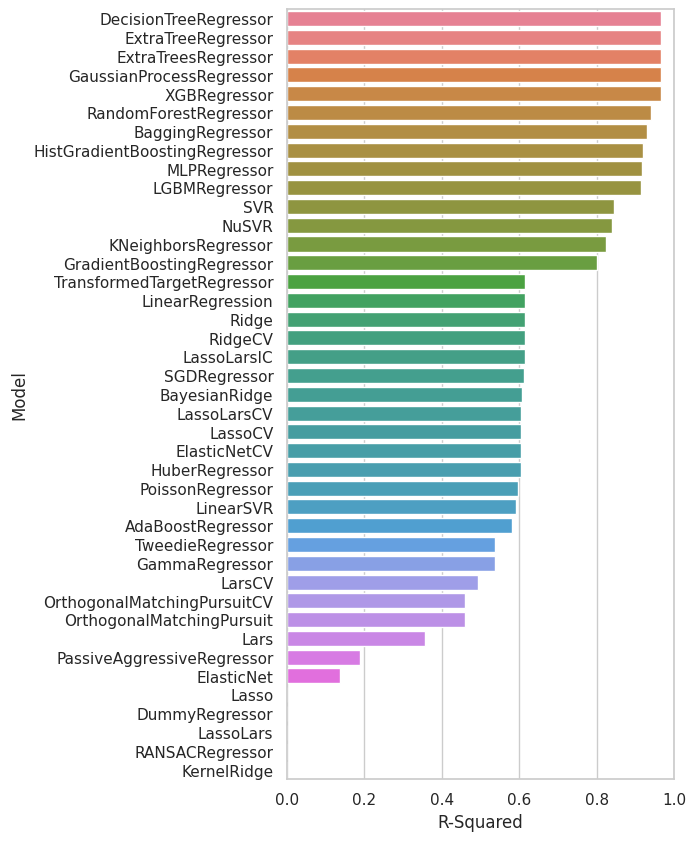

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train, hue=predictions_train.index)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

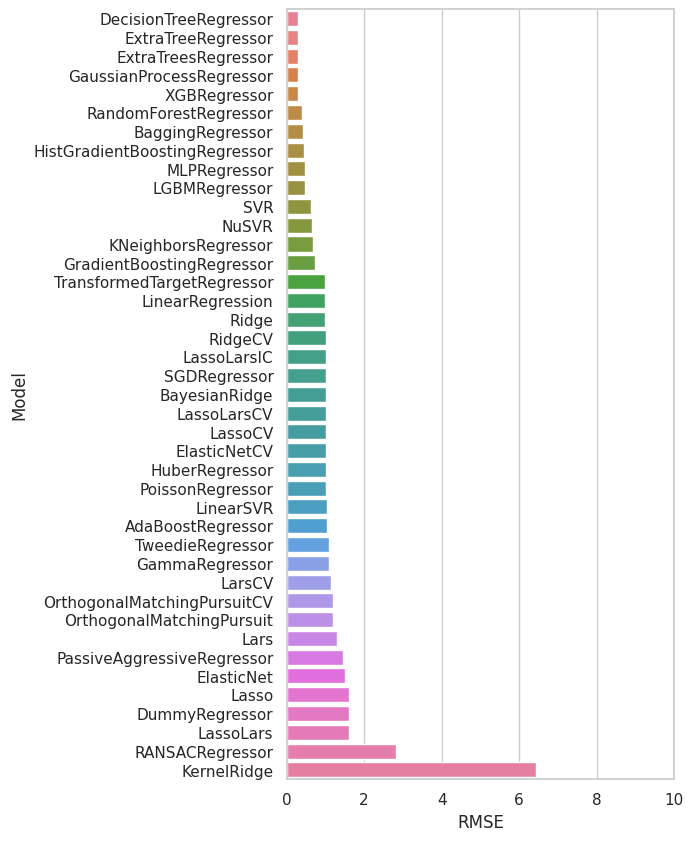

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train, hue=predictions_train.index)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

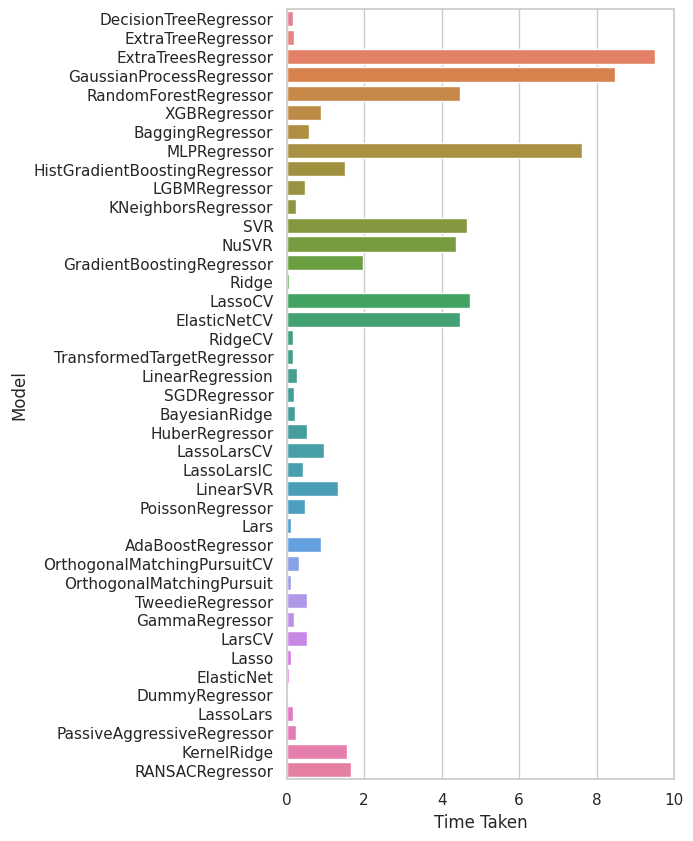

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train, hue=predictions_train.index)
ax.set(xlim=(0, 10))

In [15]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [16]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8749439284326396

# Cmap check list

In [17]:
X_cmap_MDA=pd.read_csv('positive Cmap.csv')
X_cmap_MDA

,pert_iname,cell_iname,norm_cs,SMILE
0,CC-401,MDAMB231,2.33,C1CCN(CC1)CCOC2=CC=CC(=C2)C3=NNC4=C3C=C(C=C4)C...
1,amsacrine,MDAMB231,2.13,COC1=C(C=CC(=C1)NS(=O)(=O)C)NC2=C3C=CC=CC3=NC4...
2,aphidicolin,MDAMB231,2.12,C[C@]12CC[C@H]([C@@]([C@@H]1CC[C@@H]3[C@@]24CC...
3,pelitinib,MDAMB231,2.04,CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=CC(=C(C=C3)F)Cl)...
4,SB-239063,MDAMB231,1.91,COC1=NC=CC(=N1)C2=C(N=CN2C3CCC(CC3)O)C4=CC=C(C...
...,...,...,...,...
534,BX-912,MDAMB231,0.41,C1CCN(C1)C(=O)NC2=CC=CC(=C2)NC3=NC=C(C(=N3)NCC...
535,anecortave-acetate,MDAMB231,0.40,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC=C3[C@H]2...
536,lamotrigine,MDAMB231,0.39,C1=CC(=C(C(=C1)Cl)Cl)C2=C(N=C(N=N2)N)N
537,SU-11274,MDAMB231,0.34,CC1=C(NC(=C1C(=O)N2CCN(CC2)C)C)/C=C\3/C4=C(C=C...


In [18]:
list_cmap = X_cmap_MDA['SMILE'].tolist()
list_cmap

['C1CCN(CC1)CCOC2=CC=CC(=C2)C3=NNC4=C3C=C(C=C4)C5=NC=NN5',
 'COC1=C(C=CC(=C1)NS(=O)(=O)C)NC2=C3C=CC=CC3=NC4=CC=CC=C42',
 'C[C@]12CC[C@H]([C@@]([C@@H]1CC[C@@H]3[C@@]24CC[C@@]([C@H](C3)C4)(CO)O)(C)CO)O',
 'CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=CC(=C(C=C3)F)Cl)C#N)NC(=O)/C=C/CN(C)C',
 'COC1=NC=CC(=N1)C2=C(N=CN2C3CCC(CC3)O)C4=CC=C(C=C4)F',
 'C1C2=CN=C(N=C2C3=C(C=C(C=C3)Cl)C(=N1)C4=C(C=CC=C4F)F)NC5=CC=C(C=C5)C(=O)O',
 'CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=O)NOCCO',
 'C1CNC(=O)C2=C1NC(=C2)C3=CC=NC=C3',
 'CCCCC(=O)OCC(=O)[C@]1(C[C@@H](C2=C(C1)C(=C3C(=C2O)C(=O)C4=C(C3=O)C=CC=C4OC)O)O[C@H]5C[C@@H]([C@@H]([C@@H](O5)C)O)NC(=O)C(F)(F)F)O',
 'COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C(=O)N)OCC4=CC=CC=C4C(F)(F)F)OC',
 'C[C@H](C1=CC=C(C=C1)C(=O)NC2=C3C=CNC3=NC=C2)N',
 'CN1C=C(C=N1)C2=C3C=NNC(=O)C4=C3C(=CC(=C4)NC(=O)[C@@H](C5CCCCC5)N)N2',
 'CC1=CC(=NN1)NC2=CC(=NC(=N2)SC3=CC=C(C=C3)NC(=O)C4CC4)N5CCN(CC5)C',
 'CC(C(=O)OC(C)(C)CC1=CC=C(C=C1)Cl)N',
 'CCOC(=O)C1=CN=C(C=C1)C#CC2=CC3=C(C=C2)SCCC3(C)C',
 'C1=C(N=C(

In [19]:
# Calculate fingerprints
fingerprints = []
for smile in list_cmap:
    mol = Chem.MolFromSmiles(smile)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=55)
    fingerprints.append(fp)

# Convert fingerprints to NumPy arrays
from rdkit import DataStructs
import numpy as np
fingerprint_arrays = []
for fp in fingerprints:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_arrays.append(arr)

X_cmap = np.asarray(fingerprint_arrays)
X_cmap

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.]])

In [20]:
X_cmap.shape

(539, 55)

In [132]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_cmap1 = selection.fit_transform(X_cmap)
X_cmap1.shape

(123, 52)

In [21]:
Y_pred = model.predict(X_cmap)
Y_pred

array([6.04061188, 6.02887406, 4.66853338, 5.37941676, 5.72181591,
       5.0626887 , 7.39874986, 5.42504983, 6.55133014, 7.49135901,
       4.59885403, 6.36440393, 5.27414097, 4.68887051, 5.4458808 ,
       5.30836059, 5.47063906, 6.33372967, 4.35950793, 5.19206402,
       5.03286337, 4.93243364, 4.78289698, 4.48822867, 4.7373768 ,
       5.91774285, 6.16394217, 4.75248945, 4.74758132, 4.77710519,
       5.53971944, 6.151308  , 4.78068564, 4.59289682, 8.96792513,
       5.55777804, 6.92728217, 5.43530062, 4.87666858, 6.21066799,
       5.95413153, 5.74347527, 6.01001208, 5.17054347, 6.11347301,
       6.79617485, 5.23643858, 4.94620126, 5.06174642, 5.5720158 ,
       8.27980083, 4.56695797, 4.54318081, 4.91358014, 4.60316487,
       4.82630697, 4.92811813, 5.64626245, 4.31081789, 4.96528852,
       6.26519507, 5.00947721, 4.43619704, 5.21697816, 4.95864602,
       5.06304202, 5.22749614, 4.98078245, 4.66145246, 5.04820669,
       4.74890427, 6.58893182, 4.94762435, 4.97611492, 4.59653

In [22]:
prediction_cmap = pd.concat([X_cmap_MDA, pd.DataFrame(Y_pred, columns=['pre_IC50'])], axis=1)  # Convert Y_pred to a DataFrame and specify column name
prediction_cmap

,pert_iname,cell_iname,norm_cs,SMILE,pre_IC50
0,CC-401,MDAMB231,2.33,C1CCN(CC1)CCOC2=CC=CC(=C2)C3=NNC4=C3C=C(C=C4)C...,6.04
1,amsacrine,MDAMB231,2.13,COC1=C(C=CC(=C1)NS(=O)(=O)C)NC2=C3C=CC=CC3=NC4...,6.03
2,aphidicolin,MDAMB231,2.12,C[C@]12CC[C@H]([C@@]([C@@H]1CC[C@@H]3[C@@]24CC...,4.67
3,pelitinib,MDAMB231,2.04,CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=CC(=C(C=C3)F)Cl)...,5.38
4,SB-239063,MDAMB231,1.91,COC1=NC=CC(=N1)C2=C(N=CN2C3CCC(CC3)O)C4=CC=C(C...,5.72
...,...,...,...,...,...
534,BX-912,MDAMB231,0.41,C1CCN(C1)C(=O)NC2=CC=CC(=C2)NC3=NC=C(C(=N3)NCC...,5.16
535,anecortave-acetate,MDAMB231,0.40,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC=C3[C@H]2...,5.63
536,lamotrigine,MDAMB231,0.39,C1=CC(=C(C(=C1)Cl)Cl)C2=C(N=C(N=N2)N)N,5.02
537,SU-11274,MDAMB231,0.34,CC1=C(NC(=C1C(=O)N2CCN(CC2)C)C)/C=C\3/C4=C(C=C...,5.16


In [23]:
prediction_cmap.to_csv('prediction_cmap.csv', index=False)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 358 and the array at index 1 has size 1790